# **1. Zadatak - sustavi linearnih jednadžbi**

In [2]:
import numpy as np
from scipy.linalg import lu, lu_factor, lu_solve
import matplotlib.pyplot as plt

**a)**

In [7]:
# Definicija matrice A i vektora b

A = np.array([[40, -10, -5],
              [-10, 35, -5],
              [-5, -5, 25]])

b = np.array([120, 90, 80])

# Rjesenje putem direktne metode

x_D = np.linalg.solve(A, b)

print(f"x1 = {x_D[0]}, x2 =  {x_D[1]}, x3 = {x_D[2]}")

x1 = 4.804979253112033, x2 =  4.672199170124481, x3 = 5.095435684647303


40 > |-10| + |-5|
35 > |-10| + |-5|
25 > |-5| + |-5|

Stoga je matrica dijagonalno dominantna po retcima

Gauss-Seidelova metoda radi s iteracijama i koristi ažurirane vrijednosti čim postanu dostupne, čime se poboljšava konvergencija, a iteracije konvergiraju kada je matrica strogo dijagonalno dominantna, što u ovom slučaju je i tako su povezani.

**b)**

x1 = 4.804979253112033, x2 =  4.672199170124481, x3 = 5.095435684647303

Svaki x predstavlja koeficijent opterećenja pojedinog servera u obradi zahtjeva korisnika, npr. za prvi server će koeficijent opterećenja biti ~ 4.8049793, za drugi ~ 4.6721992 i za treći ~ 5.0954357

Te numeričke vrijednosti koriste se u zadanim sustavima linearnih jednadžbi tako da bi se sustav ispravno modelirao, ovisno koji server u tom trenutku radi.

**c)**

In [14]:
# 2.1 Sedam iteracija, Tolerancija 10^-5

tol=1e-4
iter=10 # 7 dovoljno na kraju
x_nula = np.array([0, 0, 0])

def gauss_seidel(A, b, x0=x_nula, tolerance=tol, max_iterations=iter):

    x = np.zeros_like(b, dtype=np.double) # Početna aproksimacija (0, 0, 0, 0)

    #Iterate
    for k in range(max_iterations):
        x_old = x.copy()

        # prolazak po redovima matrice
        for i in range(A.shape[0]):
            x[i] = (b[i]
                    - np.dot(A[i, :i], x[:i])         # već izračunate vrijednosti
                    - np.dot(A[i, (i+1):], x_old[(i+1):])) / A[i, i]  # stare vrijednosti

        # provjera konvergencije (relativna norma)
        if np.linalg.norm(x - x_old, np.inf) / (np.linalg.norm(x, np.inf) + 1e-12) < tolerance:
            print(f"Konvergencija postignuta nakon {k+1} iteracija.")
            break
    else:
        print(f"Nije konvergiralo unutar maksimalnog broja iteracija ({iter}).")

    return x

x_gs = gauss_seidel(A, b)
print(f"Rješenje: {x_gs}")

Konvergencija postignuta nakon 7 iteracija.
Rješenje: [4.80492089 4.67216769 5.09541772]


**GAUSS-SEIDEL**

Konvergencija postignuta nakon 7 iteracija.
Rješenje: [4.80492089 4.67216769 5.09541772]


**DIREKTNA METODA**

x1 = 4.804979253112033, x2 =  4.672199170124481, x3 = 5.095435684647303

Vidimo da su rješenja poprilično slična, međutim direktna metoda je preciznija jer imamo veći broj decimala što znači veću preciznost. Zanimljivo jer je na labosima bila obrnuta situacija, ali svakako preciznost Gauss-Seidelove metode ovisi o broju iteracija i što je taj broj veći, to je preciznost te metode veća.

**d)**

In [21]:

e = x_D - x_gs # Stvarna pogreška

r = b - A @ x_gs # Rezidual, množenje matrica po pravilima radi se s operatorom '@'

norm_e = np.linalg.norm(e, np.inf)

norm_r = np.linalg.norm(r, np.inf)

norm_b = np.linalg.norm(b, np.inf)

print(f"e = {e}\n")
print(f"r = {r}\n")
print(f"||e||inf = {norm_e}\n")
print(f"||r||inf = {norm_r}\n")
print(f"||b||inf = {norm_b}")

e = [5.83627349e-05 3.14849672e-05 1.79695404e-05]

r = [ 1.92981202e-03  4.28498799e-04 -1.42108547e-14]

||e||inf = 5.836273493819988e-05

||r||inf = 0.0019298120239170657

||b||inf = 120.0


e = [5.83627349e-05 3.14849672e-05 1.79695404e-05]

r = [ 1.92981202e-03  4.28498799e-04 -1.42108547e-14]

||e||inf = 5.836273493819988e-05

||r||inf = 0.0019298120239170657

||b||inf = 120.0

Ako je rezidual velik, onda sigurno nismo blizu pravog rješenja, ako je rezidual malen ne znači da je aproksimacija blizu pravog rješenja što ujedno utječe na to je li pogreška velika ili mala.

# **2. Zadatak - aproksimacija i interpolacija**

In [27]:
import matplotlib.pyplot as plt
from numpy import sign
import numpy as np
import sympy as sp
from scipy.interpolate import lagrange

**a)**

In [59]:
def f(x):
    return np.log(x+1) - (2/x)

x = np.linspace(2, 10, 7)
y = f(x)

# Lagrangeov interpolant
P = lagrange(x, y)

# Ispis interpolacijskog polinoma
print(f"Lagrangeov interpolant P(x): {P}")

Lagrangeov interpolant P(x):             6             5           4          3         2
-1.905e-05 x + 0.0008048 x - 0.01415 x + 0.1341 x - 0.746 x + 2.564 x - 2.916


Lagrangeov interpolant P(x):             6             5           4          3         2
-1.905e-05 x + 0.0008048 x - 0.01415 x + 0.1341 x - 0.746 x + 2.564 x - 2.916

**b)**

In [60]:
J = np.column_stack([np.ones_like(x), x, x**2])

# QR faktorizacija
Q, R = np.linalg.qr(J)
a = np.linalg.solve(R, Q.T @ y)

# LSQ model
def f_ls(x):
    return a[0] + a[1]*x + a[2]*x**2

# Ispis aproksimacijskog polinoma
print(f"Aproksimacijski polinom Q(x): {Q}")

Aproksimacijski polinom Q(x): [[-3.77964473e-01 -5.66946710e-01  5.45544726e-01]
 [-3.77964473e-01 -3.77964473e-01 -5.55111512e-16]
 [-3.77964473e-01 -1.88982237e-01 -3.27326835e-01]
 [-3.77964473e-01  2.77555756e-17 -4.36435780e-01]
 [-3.77964473e-01  1.88982237e-01 -3.27326835e-01]
 [-3.77964473e-01  3.77964473e-01  1.11022302e-16]
 [-3.77964473e-01  5.66946710e-01  5.45544726e-01]]


Aproksimacijski polinom Q(x): [[-3.77964473e-01 -5.66946710e-01  5.45544726e-01]
 [-3.77964473e-01 -3.77964473e-01 -5.55111512e-16]
 [-3.77964473e-01 -1.88982237e-01 -3.27326835e-01]
 [-3.77964473e-01  2.77555756e-17 -4.36435780e-01]
 [-3.77964473e-01  1.88982237e-01 -3.27326835e-01]
 [-3.77964473e-01  3.77964473e-01  1.11022302e-16]
 [-3.77964473e-01  5.66946710e-01  5.45544726e-01]]

**c)**

In [64]:
ksi = 6.4

print(f"P({ksi}): {P(ksi)}")
print(f"Q({ksi}): {f_ls(ksi)}")
print(f"e_P = {np.abs(P(ksi)-f(ksi))}")
print(f"e_LSQ = {np.abs(f_ls(ksi)-f(ksi))}")
print(f"rel_P = {np.abs(P(ksi)-f(ksi))/abs(f(ksi))}")
print(f"rel_LSQ = {abs(f_ls(ksi)-f(ksi))/abs(f(ksi))}")

P(6.4): 1.689186141330394
Q(6.4): 1.7283617296603166
e_P = 0.00020614112026962061
e_LSQ = 0.03938172945019236
rel_P = 0.00012205065793791212
rel_LSQ = 0.023316871392966714


P(6.4): 1.689186141330394
Q(6.4): 1.7283617296603166
e_P = 0.00020614112026962061
e_LSQ = 0.03938172945019236
rel_P = 0.00012205065793791212
rel_LSQ = 0.023316871392966714

**d)**

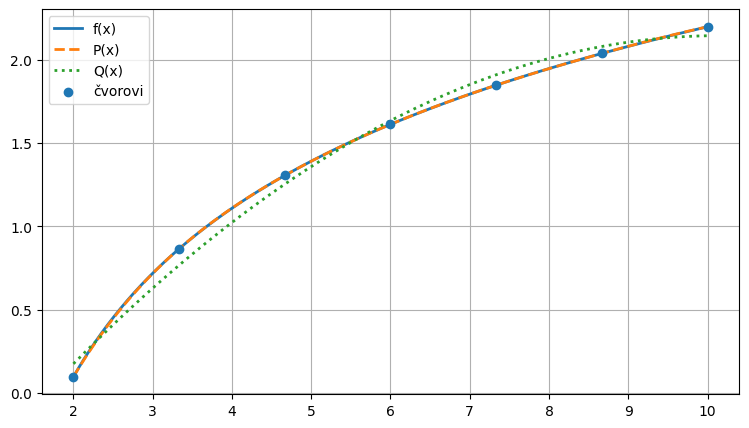

In [69]:
x_plot = np.linspace(2, 10, 500)

plt.figure(figsize=(9,5))
plt.plot(x_plot, f(x_plot), label="f(x)", linewidth=2)
plt.plot(x_plot, P(x_plot), "--", label="P(x)", linewidth=2)
plt.plot(x_plot, f_ls(x_plot), ":", label="Q(x)", linewidth=2)
plt.scatter(x, y, label="čvorovi", zorder=5)
plt.grid(True)
plt.legend()
plt.show()

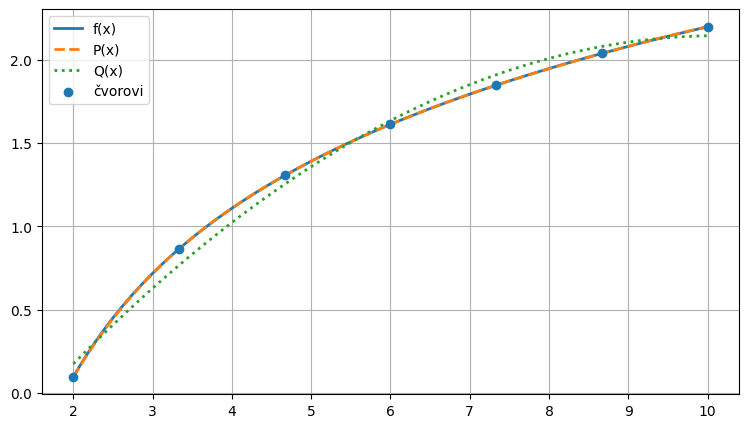

Vidimo da je Lagrangeova interpolacija točnija na intervalu [2,10 ] jer prolazi kroz sve točke dok aproksimacijski polinom malo oscilira oko točaka, ali to je i za očekivati jer je Lagrangeov interpolacijski polinom stupnja 6 što znači da puno bolje prolazi kroz točke, dok je aproksimacijski polinom stupnja 2 i puno će teže prolaziti kroz sve točke odnosno čvorove.

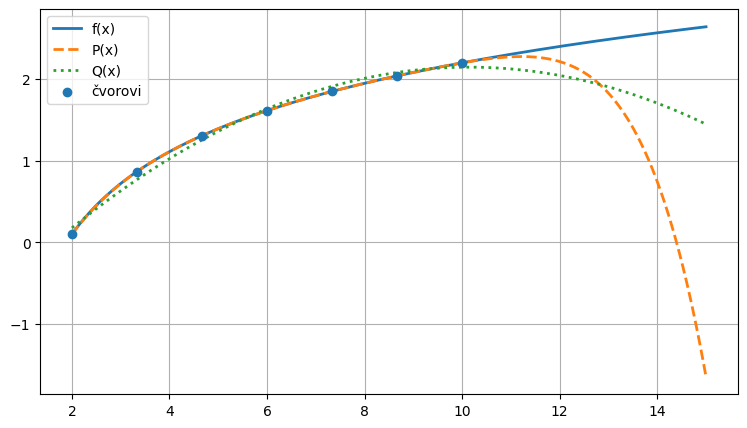

In [70]:
x_plot = np.linspace(2, 15, 500)

plt.figure(figsize=(9,5))
plt.plot(x_plot, f(x_plot), label="f(x)", linewidth=2)
plt.plot(x_plot, P(x_plot), "--", label="P(x)", linewidth=2)
plt.plot(x_plot, f_ls(x_plot), ":", label="Q(x)", linewidth=2)
plt.scatter(x, y, label="čvorovi", zorder=5)
plt.grid(True)
plt.legend()
plt.show()

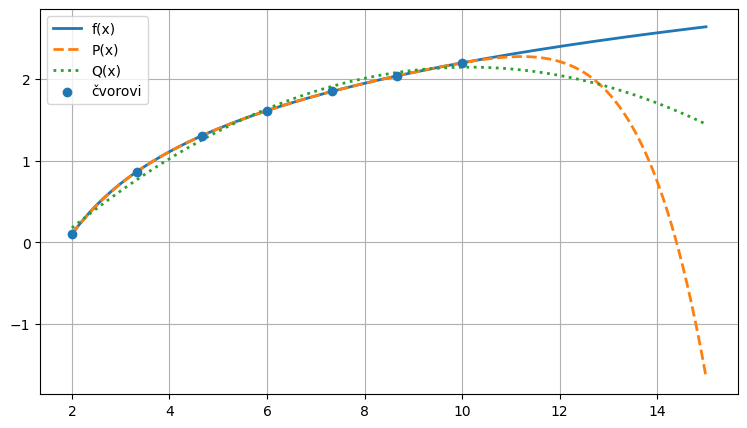

Ako povećamo malo interval na kojem se promatraju aproksimacijski i interpolacijski polinomi vidimo da Lagrange puno brže pada i ide dalje od realne funkcije jer interpolacija može više oscilirati na rubovima. S druge strane, aproksimacijski LS polinom ostaje bliži originalnoj funkciji, što znači da je "mirniji" na rubovima, ali i manje točan jer i dalje odstupa od realne funkcije.

**e) - smanjivanje broja čvorova**

In [72]:
def f(x):
    return np.log(x+1) - (2/x)

x = np.linspace(2, 10, 5)
y = f(x)

# Lagrangeov interpolant
P = lagrange(x, y)

# Ispis interpolacijskog polinoma
print(f"Lagrangeov interpolant P(x): {P}\n")

J = np.column_stack([np.ones_like(x), x, x**2])

# QR faktorizacija
Q, R = np.linalg.qr(J)
a = np.linalg.solve(R, Q.T @ y)

# LSQ model
def f_ls(x):
    return a[0] + a[1]*x + a[2]*x**2

# Ispis aproksimacijskog polinoma
print(f"Aproksimacijski polinom Q(x): {Q}\n")

ksi = 6.4

print(f"P({ksi}): {P(ksi)}\n")
print(f"Q({ksi}): {f_ls(ksi)}\n")
print(f"e_P = {np.abs(P(ksi)-f(ksi))}\n")
print(f"e_LSQ = {np.abs(f_ls(ksi)-f(ksi))}\n")
print(f"rel_P = {np.abs(P(ksi)-f(ksi))/abs(f(ksi))}\n")
print(f"rel_LSQ = {abs(f_ls(ksi)-f(ksi))/abs(f(ksi))}\n")

Lagrangeov interpolant P(x):             4           3          2
-0.0006632 x + 0.02033 x - 0.2411 x + 1.462 x - 2.014

Aproksimacijski polinom Q(x): [[-4.47213595e-01 -6.32455532e-01  5.34522484e-01]
 [-4.47213595e-01 -3.16227766e-01 -2.67261242e-01]
 [-4.47213595e-01  1.11022302e-16 -5.34522484e-01]
 [-4.47213595e-01  3.16227766e-01 -2.67261242e-01]
 [-4.47213595e-01  6.32455532e-01  5.34522484e-01]]

P(6.4): 1.6866137953147495

Q(6.4): 1.7303085658143935

e_P = 0.002366204895374757

e_LSQ = 0.04132856560426923

rel_P = 0.0014009667936153063

rel_LSQ = 0.024469541142658636



Lagrangeov interpolant P(x):             4           3          2
-0.0006632 x + 0.02033 x - 0.2411 x + 1.462 x - 2.014

Aproksimacijski polinom Q(x): [[-4.47213595e-01 -6.32455532e-01  5.34522484e-01]
 [-4.47213595e-01 -3.16227766e-01 -2.67261242e-01]
 [-4.47213595e-01  1.11022302e-16 -5.34522484e-01]
 [-4.47213595e-01  3.16227766e-01 -2.67261242e-01]
 [-4.47213595e-01  6.32455532e-01  5.34522484e-01]]

P(6.4): 1.6866137953147495

Q(6.4): 1.7303085658143935

e_P = 0.002366204895374757

e_LSQ = 0.04132856560426923

rel_P = 0.0014009667936153063

rel_LSQ = 0.024469541142658636

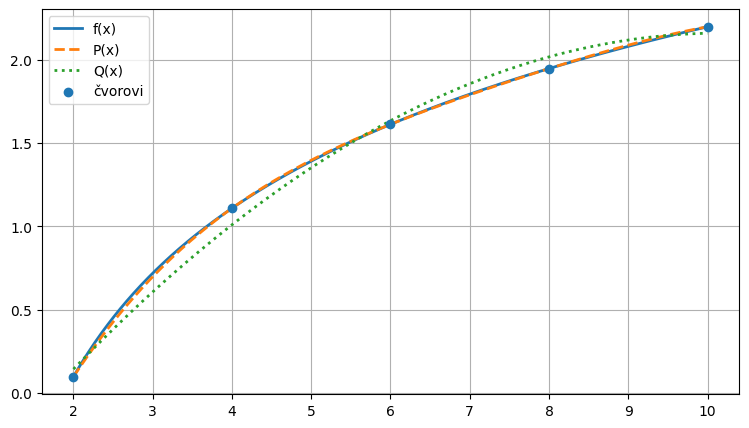

In [73]:
x_plot = np.linspace(2, 10, 500)

plt.figure(figsize=(9,5))
plt.plot(x_plot, f(x_plot), label="f(x)", linewidth=2)
plt.plot(x_plot, P(x_plot), "--", label="P(x)", linewidth=2)
plt.plot(x_plot, f_ls(x_plot), ":", label="Q(x)", linewidth=2)
plt.scatter(x, y, label="čvorovi", zorder=5)
plt.grid(True)
plt.legend()
plt.show()

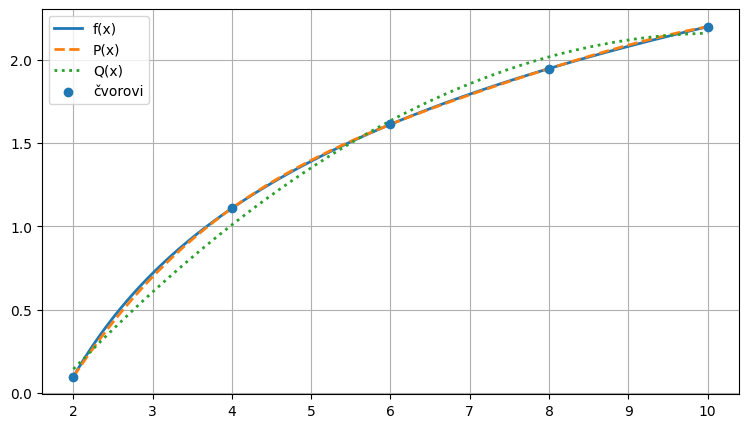

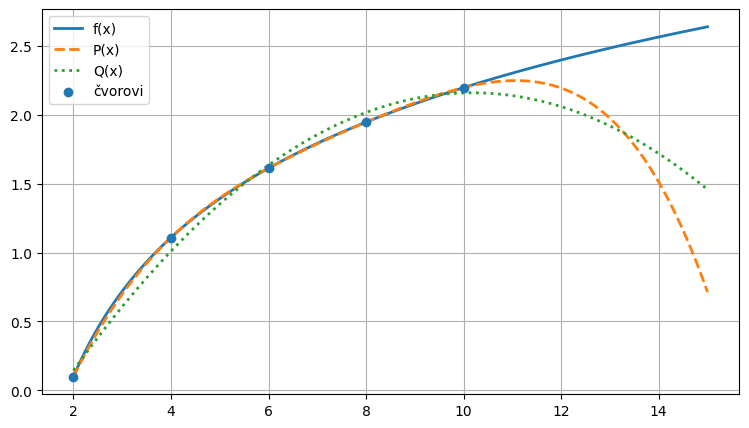

In [74]:
x_plot = np.linspace(2, 15, 500)

plt.figure(figsize=(9,5))
plt.plot(x_plot, f(x_plot), label="f(x)", linewidth=2)
plt.plot(x_plot, P(x_plot), "--", label="P(x)", linewidth=2)
plt.plot(x_plot, f_ls(x_plot), ":", label="Q(x)", linewidth=2)
plt.scatter(x, y, label="čvorovi", zorder=5)
plt.grid(True)
plt.legend()
plt.show()

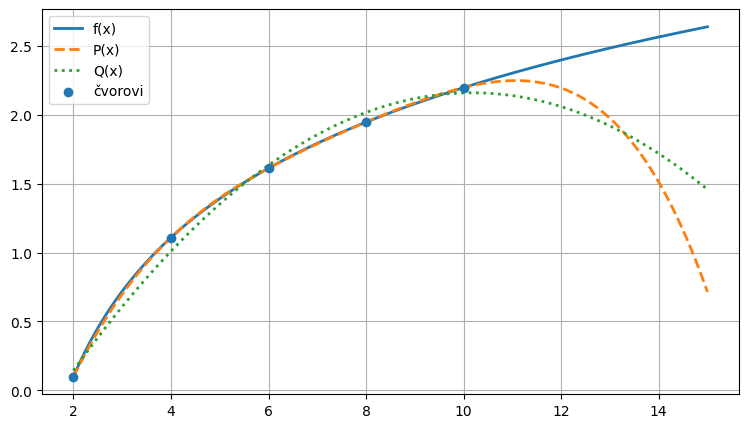

Kada smanjimo m, dolazi do interpolacije nižeg stupnja (m-1), u ovome slučaju 4. stupnja i može biti manje oscilacija, ali i će biti i veće pogreške jer ima manje informacija o funkciji, što i možemo vidjeti kad usporedimo pogreške u obje iteracije programa (s m 5 i m 7)


m=5

P(6.4): 1.6866137953147495

Q(6.4): 1.7303085658143935

e_P = 0.002366204895374757

e_LSQ = 0.04132856560426923

rel_P = 0.0014009667936153063

rel_LSQ = 0.024469541142658636

-----------------------------
m=7

P(6.4): 1.689186141330394
Q(6.4): 1.7283617296603166
e_P = 0.00020614112026962061
e_LSQ = 0.03938172945019236
rel_P = 0.00012205065793791212
rel_LSQ = 0.023316871392966714

# **3. Zadatak - ODJ**

**a)**

In [81]:
def f(x, y):
    return (x/2)*y

xmax = 2
y0 = 3
x0 = 0
h = 0.3
h_ref = 0.01

def rk4(f, x0, y0, h, xmax):
    xs = [x0]
    ys = [y0]
    x, y = x0, y0

    while x < xmax:
        k1 = f(x, y)
        k2 = f(x + h/2, y + h*k1/2)
        k3 = f(x + h/2, y + h*k2/2)
        k4 = f(x + h,   y + h*k3)

        y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        x = x + h

        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)


# Izračun - h1
xe_rk4, ye_rk4 = rk4(f, x0, y0, h, xmax)

# Ispis tablice - h1
print(f"x\t RK4 [h = {h}] \t")
for i in range(len(xe_rk4)):
    print(f"{xe_rk4[i]:.2f}\t {ye_rk4[i]:.6f}\t\n")

x	 RK4 [h = 0.3] 	
0.00	 3.000000	

0.30	 3.068265	

0.60	 3.282522	

0.90	 3.673378	

1.20	 4.299981	

1.50	 5.265139	

1.80	 6.743643	

2.10	 9.034810	



x	 RK4 [h = 0.3]
0.00	 3.000000

0.30	 3.068265

0.60	 3.282522

0.90	 3.673378

1.20	 4.299981

1.50	 5.265139

1.80	 6.743643

2.10	 9.034810

**b)**

In [85]:
def f(x, y):
    return (x/2)*y

xmax = 2
y0 = 3
x0 = 0
h = 0.01
h_ref = 0.01

def rk4(f, x0, y0, h, xmax):
    xs = [x0]
    ys = [y0]
    x, y = x0, y0

    while x < xmax:
        k1 = f(x, y)
        k2 = f(x + h/2, y + h*k1/2)
        k3 = f(x + h/2, y + h*k2/2)
        k4 = f(x + h,   y + h*k3)

        y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        x = x + h

        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)


# Izračun - h_ref
xe_rk4_ref, ye_rk4_ref = rk4(f, x0, y0, h_ref, xmax)

print(f"{xe_rk4_ref}\n")
print(f"{ye_rk4_ref}\n")


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 1.97 1.98 1.99 2.  ]

[3.         3.000075   3.00030002 3.00067508 3.00120024 3.00187559
 3.00270122 3.00367725 3.00480384 3.00608116 3.00750938 3.00908874
 3.01081946 3.01270181 3.01473607 3.01692255 3.01926157 3.02175349
 3.02439868 3.02719754 3.0301505  3.033258   3.0365205  3.03993851
 3.04351254 3.04724313 3.05113084 3.05517627 3.05938002 3.06374275
 3.0682651  3.07294778 3.07779148 3.08279696 3.08796497 3.09329631
 3.09879178 3.10445224 3.11027855 3.1162716  3.12243232 3.12876165
 3.13526058 3.14193009 3.14877122 3.15578504 3.16297262 3.17033509
 3.17787358 3.18558928 3.19348338 3.20155711 3.20981174 3.21824857
 3.22686891 3.23567412 3.24466558 3.25384472 3.26321299 3.27277186
 3.28252285 3.29246752 3.30260744 3.31294423 3.32347954 3.33421506
 3.34515252 3.35629366 3.36764029 3.37919423 3.39095736 3.40293158
 3.41511883 3.4275211  3.44014041 3.45297883 3.46603846 3.47932145
 3.49282997 3.50656627 3.52053261 3.53473131 3.54916473 3.56383527
 3.57874539 3.59389757 3.60929437 3.62493838 3.64083222 3.6569786
 3.67338026 3.69003997 3.70696057 3.72414498 3.74159611 3.75931699
 3.77731065 3.79558022 3.81412884 3.83295976 3.85207625 3.87148165
 3.89117936 3.91117284 3.93146562 3.95206129 3.9729635  3.99417595
 4.01570245 4.03754684 4.05971303 4.08220502 4.10502687 4.12818271
 4.15167675 4.17551327 4.19969662 4.22423124 4.24912164 4.27437242
 4.29998824 4.32597388 4.35233416 4.37907401 4.40619845 4.43371259
 4.46162161 4.4899308  4.51864554 4.5477713  4.57731366 4.60727828
 4.63767094 4.66849752 4.69976397 4.7314764  4.76364099 4.79626403
 4.82935196 4.86291129 4.89694866 4.93147084 4.96648471 5.00199728
 5.03801567 5.07454715 5.11159909 5.14917902 5.1872946  5.2259536
 5.26516397 5.30493378 5.34527123 5.38618471 5.42768272 5.46977394
 5.51246719 5.55577145 5.59969588 5.64424978 5.68944264 5.73528411
 5.78178402 5.82895237 5.87679937 5.92533537 5.97457096 6.02451687
 6.07518407 6.12658371 6.17872716 6.23162597 6.28529192 6.33973702
 6.39497348 6.45101375 6.50787049 6.56555661 6.62408526 6.68346983
 6.74372396 6.80486154 6.86689671 6.92984391 6.9937178  7.05853335
 7.12430579 7.19105066 7.25878376 7.32752121 7.39727943 7.46807515
 7.5399254  7.61284756 7.68685932 7.7619787  7.83822408 7.91561419
 7.9941681  8.07390526 8.15484549]

**c)**

**d)**

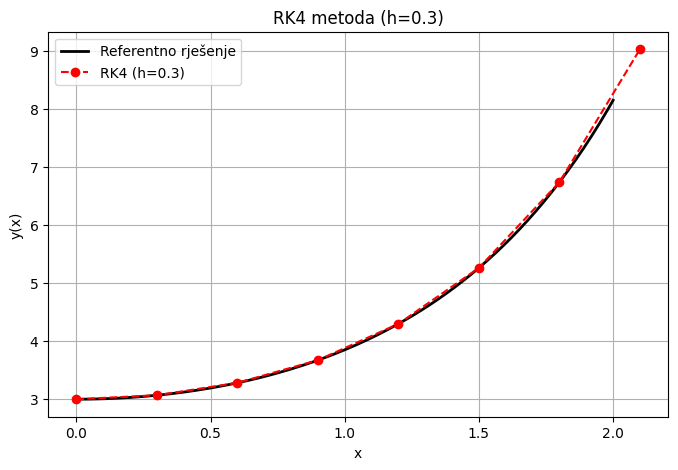

In [89]:
# Graf
plt.figure(figsize=(8,5))
plt.plot(xe_rk4_ref, ye_rk4_ref, 'k-', linewidth=2, label='Referentno rješenje')
plt.plot(xe_rk4, ye_rk4, 'ro--', label='RK4 (h=0.3)')
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.title("RK4 metoda (h=0.3)")
plt.show()

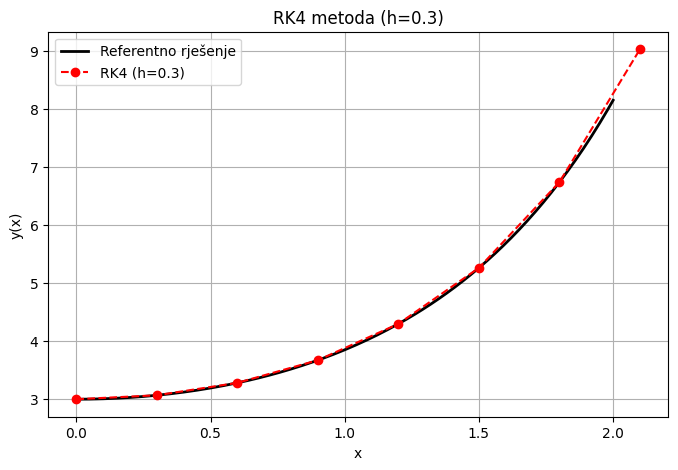

Vidimo da su referentno rješenje, koje je u biti isto RK4 samo s manjim h, i RK4 s većim h približno tu negdje, ali počinju vidljivo odstupati na grafu počevši s vrijednosti 1.5 na x osi gdje se više ne preklapaju direktno.